In [90]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score

In [58]:
df = pd.read_csv('../data/processed/movie_stats/movie_stats_clustered.csv')
reviews = pd.read_csv('../data/processed/all_reviews.csv').drop(columns='Unnamed: 0')
df.movie_name = df.movie_name.str.lower()
df.movie_name = df.movie_name.str.replace(' ', '-')
df.movie_name = df.movie_name.str.replace(':', '')
df.movie_name = df.movie_name.str.replace('the-avengers', 'avengers-assemble')
df = df.query('movie_name != "the-marvels"')
reviews2 = reviews.copy()
reviews = reviews.dropna(subset='score')
# df = df.sort_values('movie_name')

/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_4257/1621350978.py:2: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('../data/processed/all_reviews.csv').drop(columns='Unnamed: 0')


In [59]:
df.head()

,Unnamed: 0,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,film_series_cluster,cast_similarity
1,1,guardians-of-the-galaxy-vol.-3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302,9,2,0.823059
2,2,spider-man-no-way-home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111,5,7,0.549519
3,3,avengers-infinity-war,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039,6,1,0.779569
4,4,ant-man-and-the-wasp-quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180,4,4,0.546267
5,5,black-panther-wakanda-forever,tt9114286,2022-11-09,"{'Letitia Wright': 'Shuri / Black Panther', ""L...",['Ryan Coogler'],['Marvel Studios'],250000000,859102154,3,10,0.257418


In [60]:
for i in set(reviews.movie):
    if i not in set(df.movie_name):
        print(i)
print('-----------')
for i in set(df.movie_name):
    if i not in set(reviews.movie):
        print(i)

antman-and-the-wasp
shangchi-and-the-legend-of-the-ten-rings
the-guardians-of-the-galaxy-holiday-special
werewolf-by-night
antman-and-the-wasp-quantumania
-----------


In [61]:
yes_dict = {str(i) : [] for i in range(len(set(reviews.score))+1)}
yes_dict['mean_score'] = []
yes_dict['median_score'] = []

most_revs = []
for i in df.movie_name:
    df1 = df.query('movie_name == @i')
    df_rev = reviews.query('movie == @i')
    score_list = [[] for i in range(len(set(reviews.score))+1)]
    for j in range(len(score_list)):
        df2 = reviews.query('movie == @i & score == @j')
        score_list[j].append(int(len(df2)) / len(df_rev))
        yes_dict[str(j)].append(score_list[j][0])
    yes_dict['mean_score'].append(np.mean(df_rev.score)/10)
    yes_dict['median_score'].append(np.median(df_rev.score)/10)

In [62]:
for i, j in yes_dict.items():
    df[i] = j
df = df.drop(columns='0')

In [63]:
y = df[['movie_revenue']]
df_pca = df.drop(columns=['Unnamed: 0','film_series',  'film_series_cluster', 'imdb_id', 'cast', 'direction', 'production_companies', 'movie_revenue'])
df_pca = df_pca.set_index('movie_name')

scaler = preprocessing.MinMaxScaler()

In [64]:
df_pca['release_date']  = pd.to_datetime(df_pca['release_date'])

In [65]:
df_pca['release_date']  = (df_pca['release_date'] - dt.datetime(1970,1,1)).dt.total_seconds()

df_pca['release_date']  = scaler.fit_transform(np.array(df_pca['release_date']).reshape(-1,1))
df_pca['movie_budget']  = scaler.fit_transform(np.array(df_pca['movie_budget']).reshape(-1,1))



In [66]:
var_list = []
for i in range(1 , len(df_pca.columns) + 1):
    # print(i)
    pca = PCA(n_components=i)
    pca.fit_transform(df_pca)
    # print(pca.get_feature_names_out())
    var_list.append(pca.explained_variance_ratio_.cumsum())

In [67]:
df_after_pca = pd.DataFrame(pca.components_, columns= df_pca.columns, index = pca.get_feature_names_out())

<Axes: >

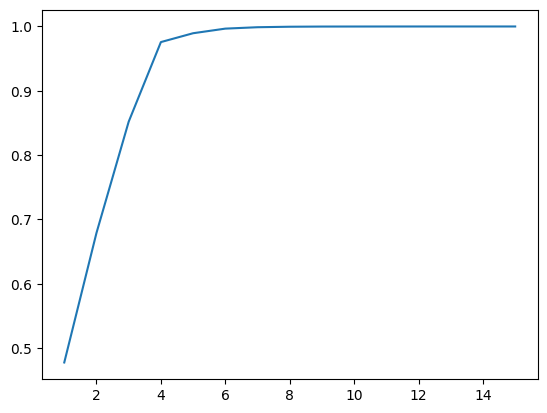

In [68]:
sns.lineplot(x = range(1, 16), y = var_list[-1])

In [69]:
# df_pca.to_parquet('../data/processed/movie_stats/pca_data.parquet')

In [70]:
# reviews.iloc[:150000].to_parquet('../data/processed/reviews1.parquet')
# reviews.iloc[150000:].to_parquet('../data/processed/reviews2.parquet')

In [71]:
def corr_data(reviews, df):
    for i in set(reviews.movie):
        i_df = reviews.query('movie == @i')

In [72]:
df['mean_score'] = df['mean_score'] * 10
df['median_score'] = df['median_score'] * 10

df.drop(columns=['Unnamed: 0']).to_csv('../data/plot_data/graph_data.csv')

In [73]:
df.columns

Index(['Unnamed: 0', 'movie_name', 'imdb_id', 'release_date', 'cast',
       'direction', 'production_companies', 'movie_budget', 'movie_revenue',
       'film_series', 'film_series_cluster', 'cast_similarity', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', 'mean_score', 'median_score'],
      dtype='object')

In [74]:
df.head()

,Unnamed: 0,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,...,3,4,5,6,7,8,9,10,mean_score,median_score
1,1,guardians-of-the-galaxy-vol.-3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302,9,...,0.013507,0.027099,0.019012,0.044563,0.047402,0.115709,0.120699,0.559446,8.526411,10.0
2,2,spider-man-no-way-home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111,5,...,0.018690,0.023940,0.029819,0.051134,0.061634,0.091243,0.129252,0.539059,8.396367,10.0
3,3,avengers-infinity-war,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039,6,...,0.015914,0.019612,0.028690,0.037431,0.054354,0.105906,0.177743,0.500616,8.404236,10.0
4,4,ant-man-and-the-wasp-quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180,4,...,0.039254,0.062970,0.051848,0.095518,0.104841,0.172064,0.077527,0.278705,6.961400,8.0
5,5,black-panther-wakanda-forever,tt9114286,2022-11-09,"{'Letitia Wright': 'Shuri / Black Panther', ""L...",['Ryan Coogler'],['Marvel Studios'],250000000,859102154,3,...,0.026659,0.044026,0.037687,0.062956,0.050538,0.087444,0.074071,0.520754,7.884856,10.0


In [75]:
round(stats.linregress(df['10'], df['movie_revenue']).rvalue, 3)

0.499

In [76]:
round(stats.linregress(df['mean_score'], df['movie_revenue']).rvalue, 3)

0.279

In [77]:
reviews2.query('source == "rt_crit"')

,index,date,user,score,title,text,url,movie,scrape_date,is_rotten,source,scrape date
356176,0,2023-09-07,Jeffrey Peterson,NaN,NaN,Ant-Man and the Wasp: Quantumania is a film th...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,0.0,rt_crit,2023-10-20
356177,1,2023-08-23,Lee Zumpe,NaN,NaN,It may feel like the director ordered a truckl...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,0.0,rt_crit,2023-10-20
356178,2,2023-08-16,Cris Parker,NaN,NaN,While I still like the film overall. Every MCU...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,0.0,rt_crit,2023-10-20
356179,3,2023-08-16,Sarah Vincent,NaN,NaN,the two-dimensional supporting characters and ...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,1.0,rt_crit,2023-10-20
356180,4,2023-08-09,Rick Bentley,NaN,NaN,The errors are easy to miss because the script...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,1.0,rt_crit,2023-10-20
...,...,...,...,...,...,...,...,...,...,...,...,...
369010,12834,2022-09-27,Marisa Mirabal,NaN,NaN,"Utilizing elements of dark comedy, light roman...",https://www.rottentomatoes.com/m/werewolf_by_n...,werewolf-by-night,2023-10-21,0.0,rt_crit,2023-10-20
369011,12835,2022-09-26,Beau Paul,NaN,NaN,The film also reveals itself to be a perfectly...,https://www.rottentomatoes.com/m/werewolf_by_n...,werewolf-by-night,2023-10-21,0.0,rt_crit,2023-10-20
369012,12836,2022-09-26,Alan Cerny,NaN,NaN,I love how (Michael) Giacchino pays homage to ...,https://www.rottentomatoes.com/m/werewolf_by_n...,werewolf-by-night,2023-10-21,0.0,rt_crit,2023-10-20
369013,12837,2022-09-26,Kate Sánchez,NaN,NaN,Werewolf By Night is perfection and there is n...,https://www.rottentomatoes.com/m/werewolf_by_n...,werewolf-by-night,2023-10-21,0.0,rt_crit,2023-10-20


In [81]:
crit_scores = []
for i in df.movie_name:
    df_revs = reviews2.query('source == "rt_crit" & movie == @i')
    print(i, 1 - sum(df_revs['is_rotten'])/len(df_revs))
    crit_scores.append(1 - sum(df_revs['is_rotten'])/len(df_revs))
df['crit_score'] = crit_scores

guardians-of-the-galaxy-vol.-3 0.8170426065162908
spider-man-no-way-home 0.9280742459396751
avengers-infinity-war 0.8516260162601625
ant-man-and-the-wasp-quantumania 0.45721271393643037
black-panther-wakanda-forever 0.8359550561797753
thor-love-and-thunder 0.6292134831460674
avengers-assemble 0.9100817438692098
captain-marvel 0.7902350813743219
doctor-strange-in-the-multiverse-of-madness 0.7358078602620087
avengers-endgame 0.9388489208633094
avengers-age-of-ultron 0.7592592592592593
shang-chi-and-the-legend-of-the-ten-rings 0.9154518950437318
iron-man 0.9357142857142857
captain-america-civil-war 0.9069767441860466
iron-man-2 0.7161716171617162
spider-man-homecoming 0.92
eternals 0.47215496368038745
thor 0.7728813559322034
thor-ragnarok 0.9318181818181819
black-widow 0.7872807017543859
guardians-of-the-galaxy-vol.-2 0.851764705882353
thor-the-dark-world 0.6701388888888888
spider-man-far-from-home 0.9041394335511983
doctor-strange 0.8891752577319587
iron-man-3 0.7945619335347431
black-pa

In [82]:
round(stats.linregress(df['crit_score'], df['movie_revenue']).rvalue, 3)

0.419

In [93]:
for i in df.columns:
    try:
        mymodel = np.poly1d(np.polyfit(df[i], df['movie_revenue'], 2))
        print(i,round(stats.linregress(df[i], df['movie_revenue']).rvalue, 3), round(r2_score(df['movie_revenue'], mymodel(df[i])), 3))
    except:
        continue

Unnamed: 0 -0.418 0.183
movie_budget 0.69 0.482
movie_revenue 1.0 1.0
film_series 0.335 0.255
film_series_cluster -0.358 0.244
cast_similarity -0.165 0.168
1 0.091 0.056
2 -0.056 0.005
3 -0.076 0.007
4 -0.223 0.059
5 -0.289 0.126
6 -0.419 0.175
7 -0.472 0.225
8 -0.505 0.278
9 0.169 0.11
10 0.499 0.259
mean_score 0.279 0.109
median_score 0.47 0.292
crit_score 0.419 0.196


In [84]:
df.drop(columns=['Unnamed: 0']).to_csv('../data/plot_data/graph_data.csv')


In [87]:
print(i, (stats.logistic(df['movie_budget'], df['movie_revenue'])))


crit_score <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15cba0650>
